In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data_dbd.csv", sep=';')

In [28]:
df = pd.read_csv("data_dbd.csv", sep=';')

In [29]:
print("Statistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
               Age  Hemoglobin(g/dl)  Neutrophils(%)  Lymphocytes(%)  \
count  1306.000000       1306.000000     1306.000000     1306.000000   
mean     34.421899         16.083054       45.903522       41.287902   
std      12.507057         14.014912        4.323494        5.393465   
min      15.000000         11.400000       33.000000       32.000000   
25%      24.000000         14.200000       44.000000       37.000000   
50%      31.000000         14.780000       47.000000       41.000000   
75%      44.000000         15.560000       49.000000       46.000000   
max      70.000000        161.024000       55.000000       50.000000   

       Monocytes(%)  Eosinophils(%)          RBC       HCT(%)      MCV(fl)  \
count   1306.000000     1306.000000  1306.000000  1306.000000  1306.000000   
mean       3.027565        3.119449     5.223583    53.874280    89.871822   
std        0.894002        1.163745     0.688557    55.122896     5.477995   
min        2.0000

In [30]:
print(df.columns.tolist())


['Gender', 'Age', 'Hemoglobin(g/dl)', 'Neutrophils(%)', 'Lymphocytes(%)', 'Monocytes(%)', 'Eosinophils(%)', 'RBC', 'HCT(%)', 'MCV(fl)', 'MCH(pg)', 'MCHC(g/dl)', 'RDW-CV(%)', 'Total Platelet Count(/cumm)', 'MPV(fl)', 'PDW(%)', 'PCT(%)', 'Total WBC count(/cumm)', 'Result']


In [31]:
fitur = ['Total Platelet Count(/cumm)', 'Lymphocytes(%)', 'Total WBC count(/cumm)', 'Neutrophils(%)', 'Hemoglobin(g/dl)']

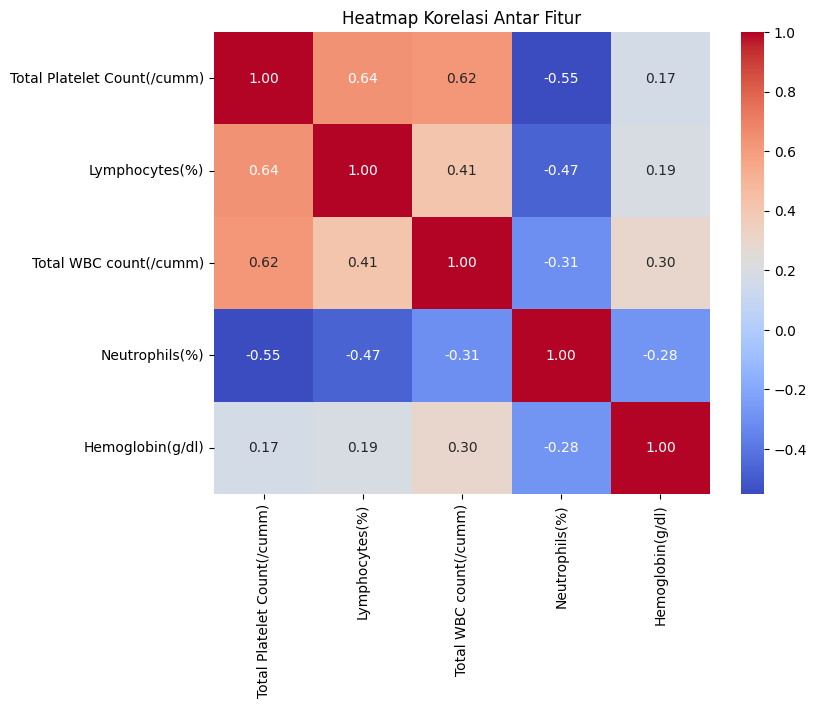

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[fitur].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


In [33]:
df['Label'] = df['Result'].map({'Tidak DBD': 0, 'Ya DBD': 1})

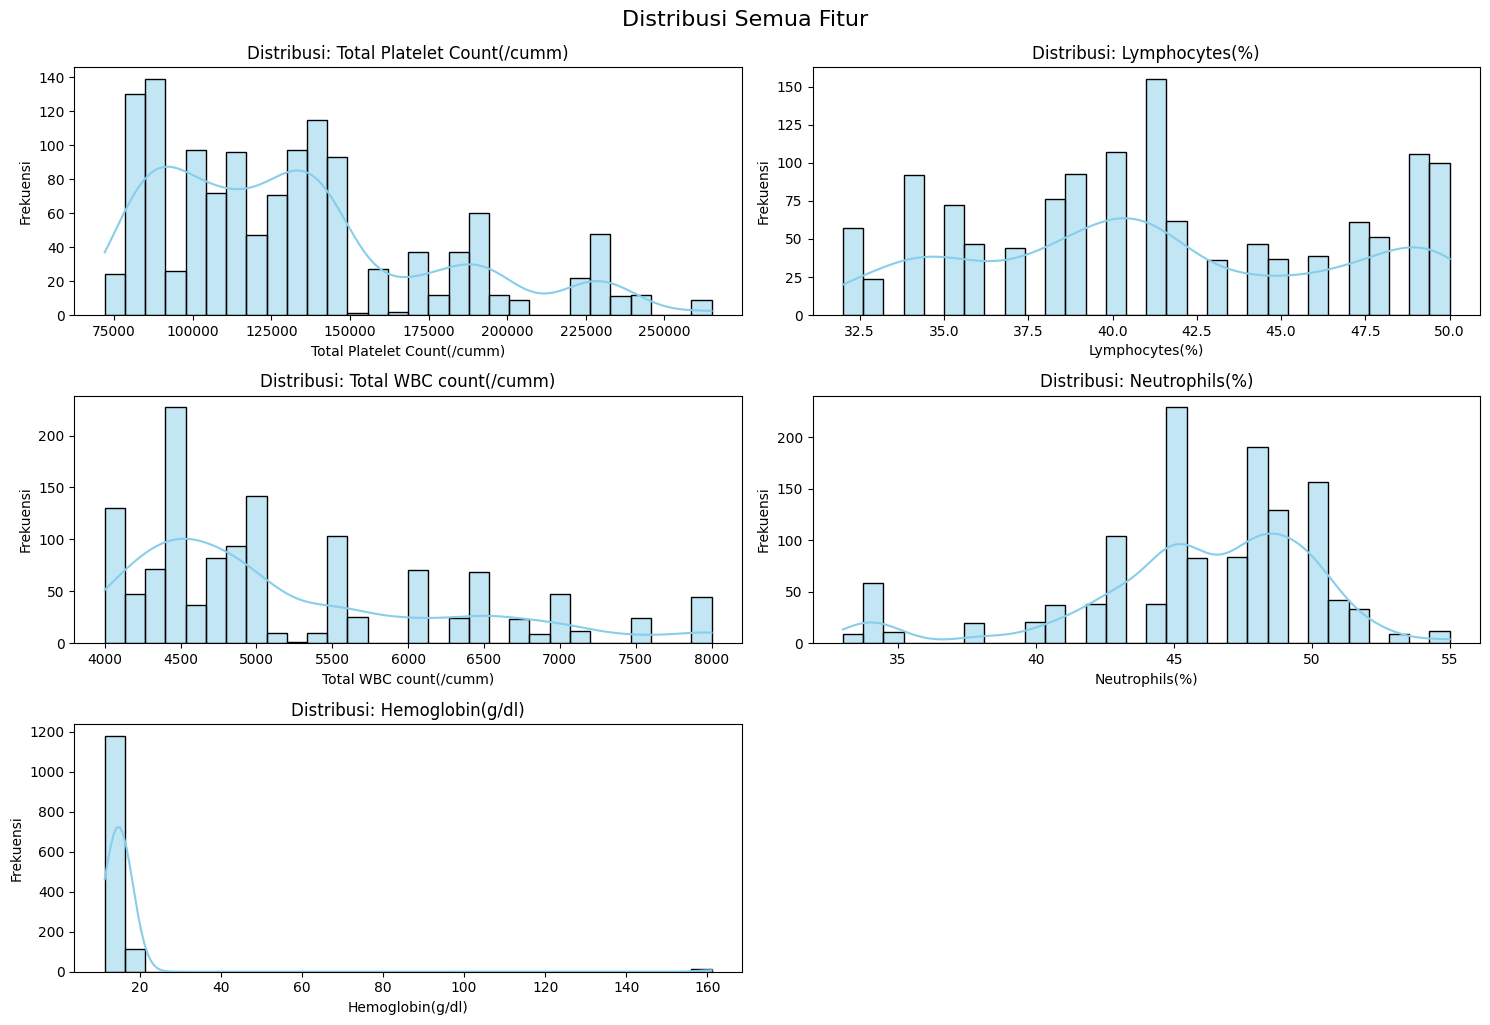

In [41]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(fitur):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.suptitle("Distribusi Semua Fitur", fontsize=16, y=1.02)
plt.show()


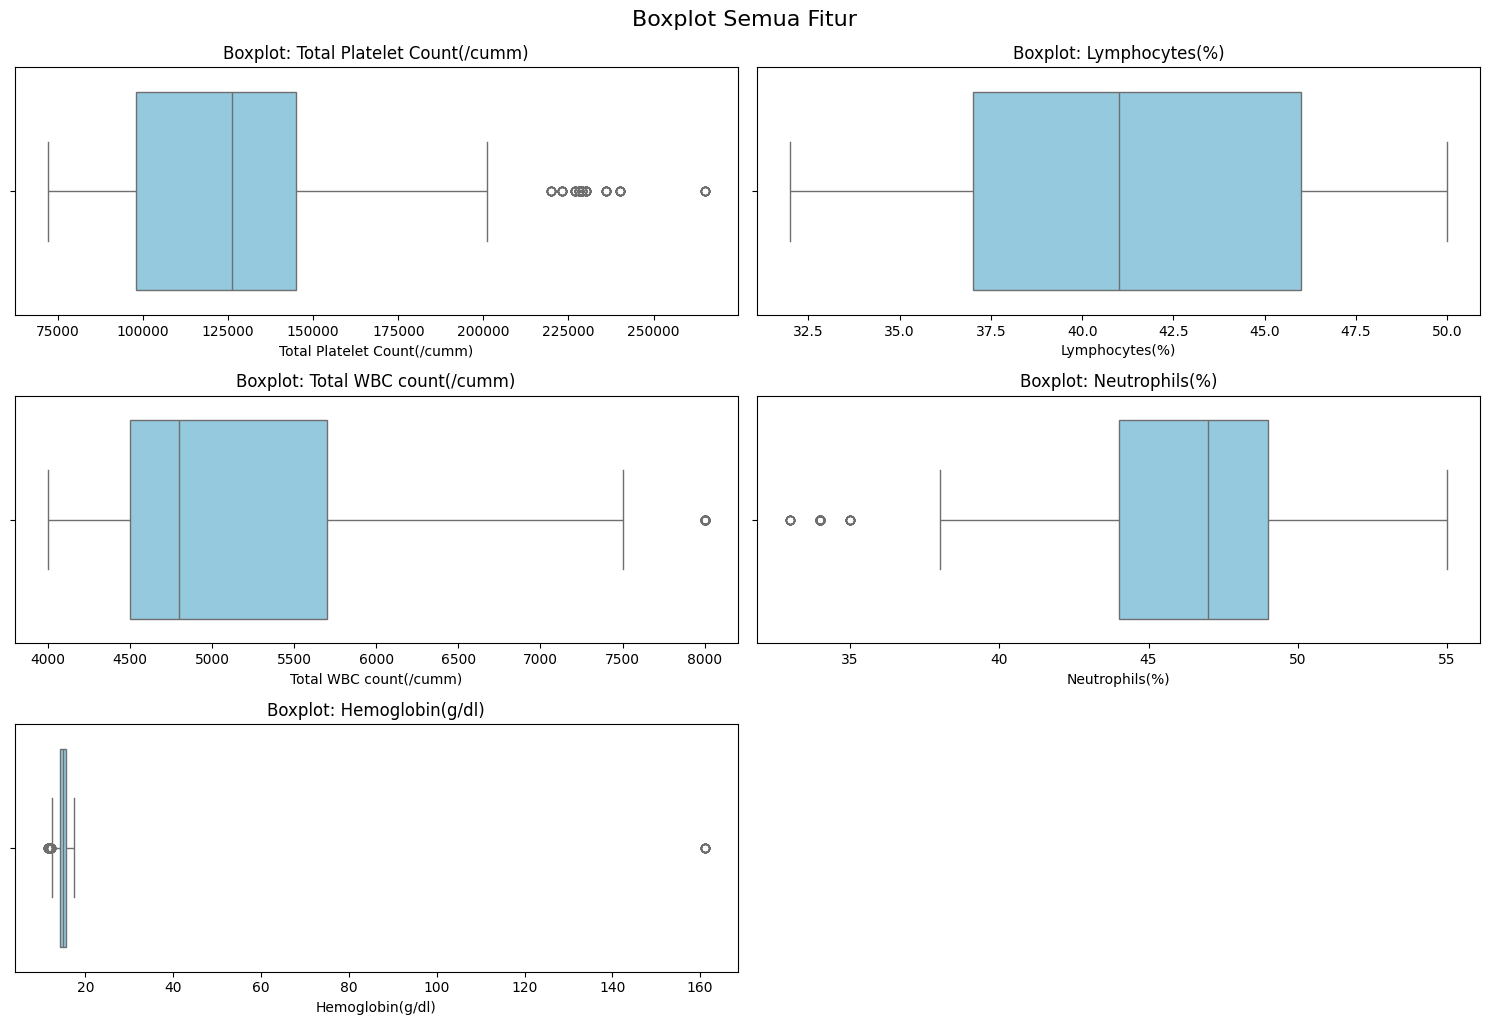

In [46]:
# BOXPLOT UNTUK DETEKSI OUTLIER
# ===============================
plt.figure(figsize=(15, 10))

for i, col in enumerate(fitur):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.suptitle("Boxplot Semua Fitur", fontsize=16, y=1.02)
plt.show()


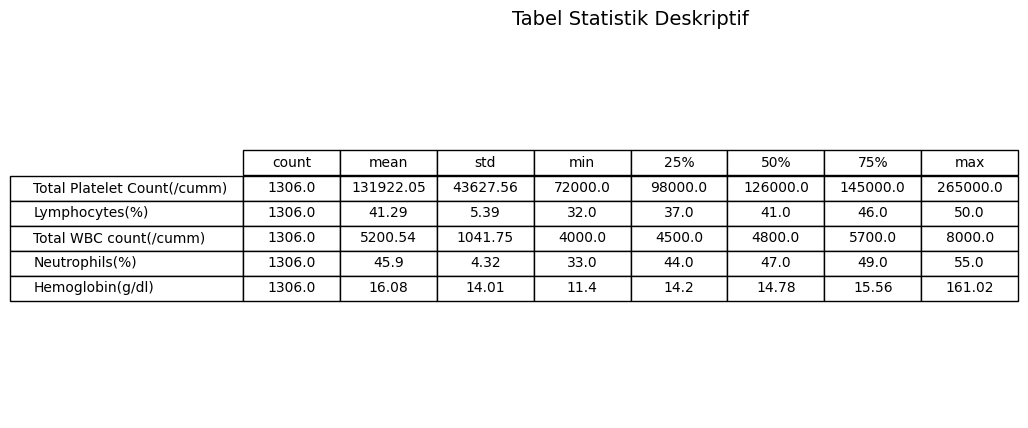

In [40]:
# 9. TABEL STATISTIK DESKRIPTIF SEBAGAI GAMBAR
desc = df[fitur].describe().T.round(2)

plt.figure(figsize=(10, 5))
plt.axis('off')
tbl = plt.table(cellText=desc.values,
                colLabels=desc.columns,
                rowLabels=desc.index,
                cellLoc='center',
                loc='center')
tbl.scale(1, 1.5)
plt.title("Tabel Statistik Deskriptif", fontsize=14)
plt.show()

In [ ]:
print("Informasi Struktur Data:")
print(df.info())



Informasi Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Platelet          1306 non-null   int64  
 1   WBC               1306 non-null   int64  
 2   HCT               1306 non-null   float64
 3   Hemoglobin(g/dl)  1306 non-null   float64
 4   Lymphocytes       1306 non-null   int64  
 5   Neutrophils(%)    1306 non-null   int64  
 6   Monocytes(%)      1306 non-null   int64  
 7   MPV(fl)           1306 non-null   float64
 8   PDW(%)            1306 non-null   float64
 9   PCT(%)            1306 non-null   float64
 10  Result            1306 non-null   object 
 11  Label             1306 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 122.6+ KB
None


In [ ]:
print("Jumlah Missing Value per Kolom:")
print(df.isnull().sum())


Jumlah Missing Value per Kolom:
Platelet            0
WBC                 0
HCT                 0
Hemoglobin(g/dl)    0
Lymphocytes         0
Neutrophils(%)      0
Monocytes(%)        0
MPV(fl)             0
PDW(%)              0
PCT(%)              0
Result              0
Label               0
dtype: int64


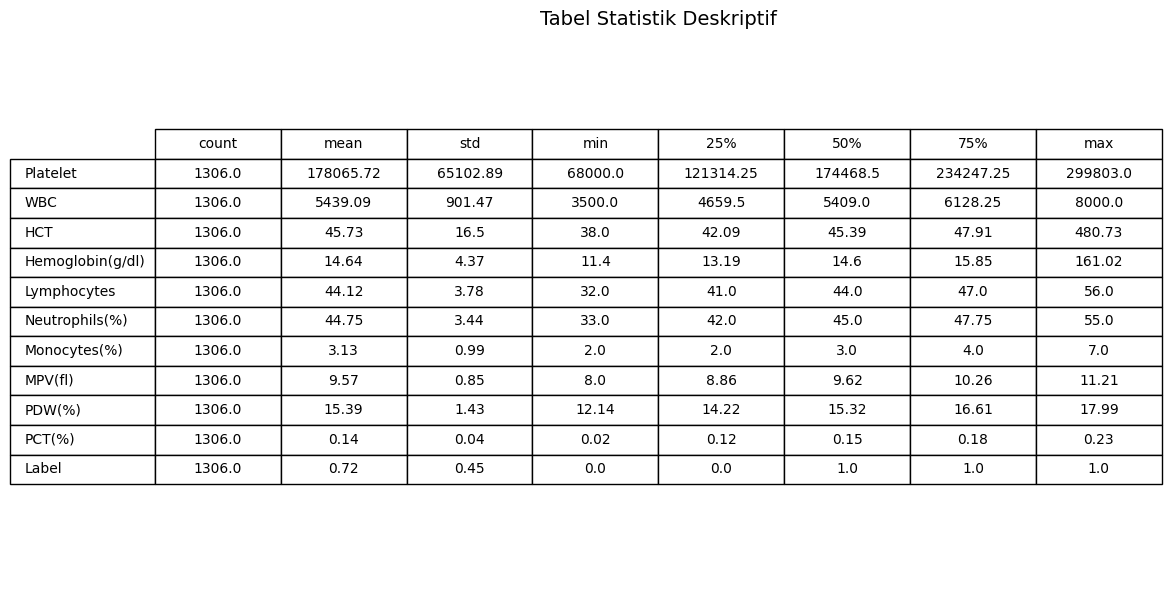

In [ ]:

# Hitung deskriptif
desc = df.describe().T.round(2)

# Buat gambar tabel
plt.figure(figsize=(12, 6))
plt.axis('off')
table = plt.table(cellText=desc.values,
                  colLabels=desc.columns,
                  rowLabels=desc.index,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.title("Tabel Statistik Deskriptif", fontsize=14)
plt.tight_layout()
plt.savefig("statistik_deskriptif.png", dpi=300)
plt.show()



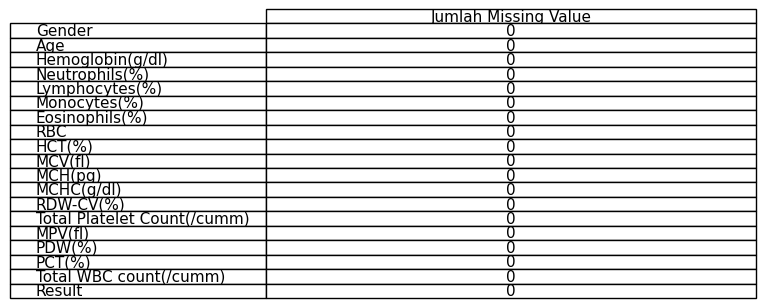

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset asli kamu
df = pd.read_csv("data_dbd.csv", sep=';')  # pastikan delimiter ; sesuai file kamu

# Hitung jumlah missing value untuk semua kolom
missing = df.isnull().sum().to_frame(name='Jumlah Missing Value')

# Buat visualisasi tabel missing value
plt.figure(figsize=(10, 4))
plt.axis('off')
table = plt.table(
    cellText=missing.values,
    rowLabels=missing.index,
    colLabels=missing.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.5, 1.5)

plt.title("", fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.savefig("tabel_missing_value.png", dpi=300)
plt.show()


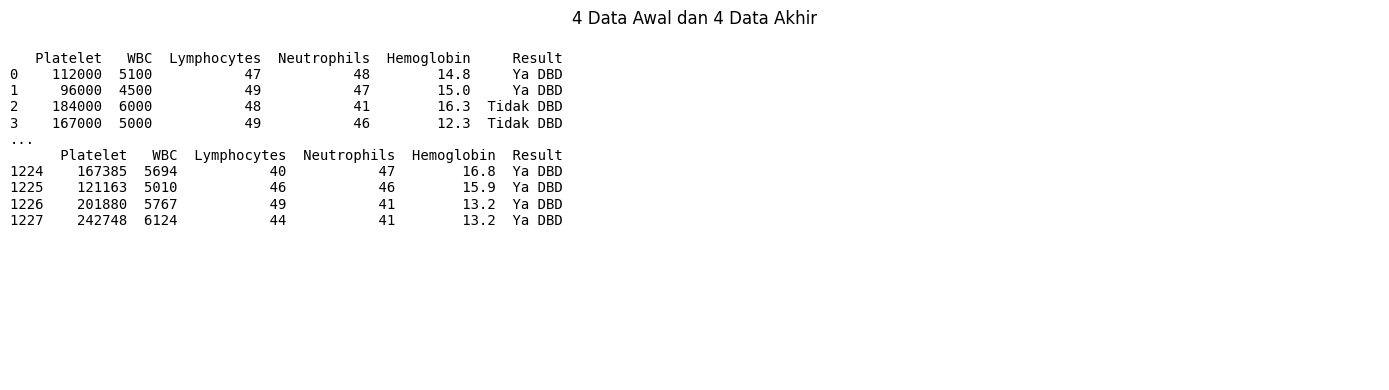

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load Data (Contoh) ===
df = pd.read_csv("data_final.csv")

# Ambil 4 data awal dan 4 akhir
df_awal = df.head(4)
df_akhir = df.tail(4)

# Buat teks gabungan seperti Pandas print
text = df_awal.to_string(index=True)
text += "\n...\n"
text += df_akhir.to_string(index=True)

# === Buat Gambar dari Teks Tersebut ===
plt.figure(figsize=(14, 4))
plt.axis('off')
plt.text(0, 1, text, fontsize=10, family='monospace', verticalalignment='top')
plt.title("4 Data Awal dan 4 Data Akhir", fontsize=12, pad=20)
plt.tight_layout()
plt.show()


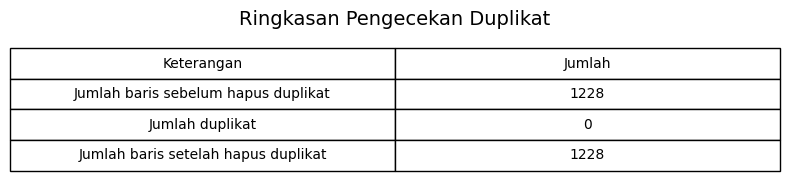

In [18]:
import matplotlib.pyplot as plt

# === Data Ringkasan Duplikat ===
summary_data = [
    ["Jumlah baris sebelum hapus duplikat", 1228],
    ["Jumlah duplikat", 0],
    ["Jumlah baris setelah hapus duplikat", 1228]
]

# === Visualisasi sebagai Gambar Tabel ===
plt.figure(figsize=(8, 2))
plt.axis('off')
table = plt.table(
    cellText=summary_data,
    colLabels=["Keterangan", "Jumlah"],
    cellLoc='center',
    colLoc='center',
    loc='center'
)
table.scale(1, 2)
plt.title("Ringkasan Pengecekan Duplikat", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


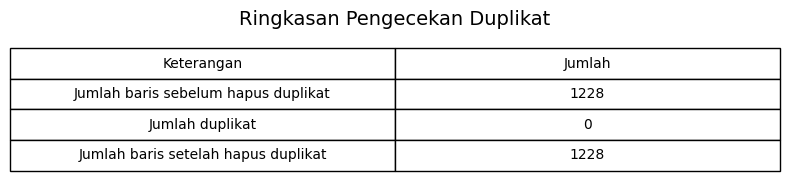

Mapping Label Result:
Tidak DBD → 0
Ya DBD → 1


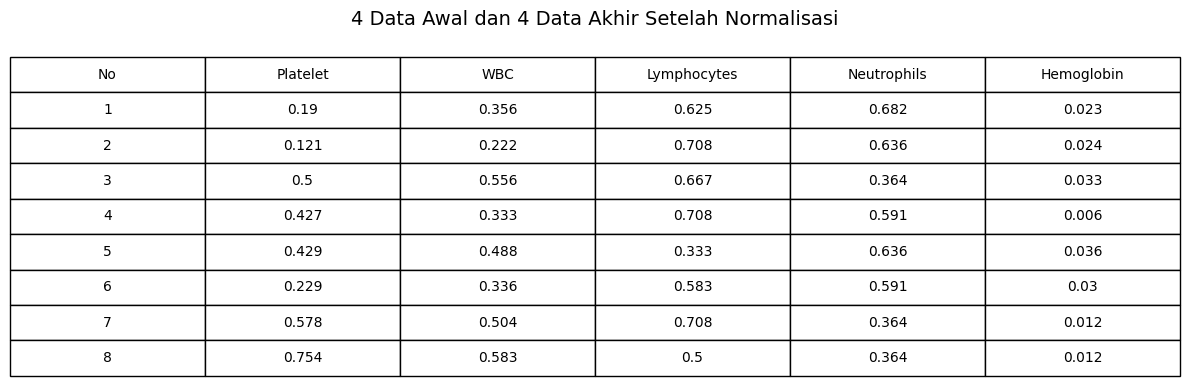

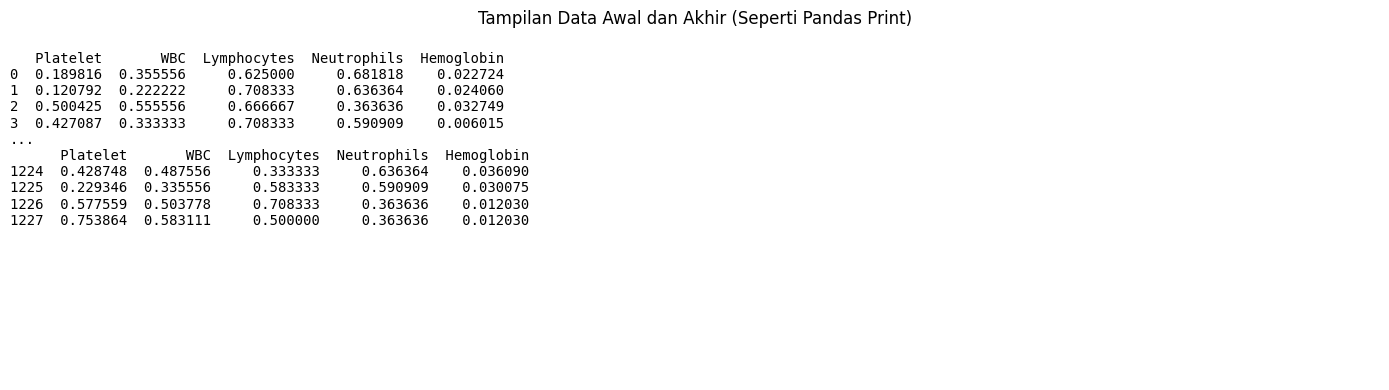

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

# === 1. Load Data ===
df = pd.read_csv("data_final.csv")

# === 2. Cek dan Visualisasi Ringkasan Duplikat ===
summary_data = [
    ["Jumlah baris sebelum hapus duplikat", len(df)],
    ["Jumlah duplikat", df.duplicated().sum()],
    ["Jumlah baris setelah hapus duplikat", len(df.drop_duplicates())]
]
plt.figure(figsize=(8, 2))
plt.axis('off')
table = plt.table(
    cellText=summary_data,
    colLabels=["Keterangan", "Jumlah"],
    cellLoc='center',
    colLoc='center',
    loc='center'
)
table.scale(1, 2)
plt.title("Ringkasan Pengecekan Duplikat", fontsize=14, pad=10)
plt.tight_layout()
plt.show()

# Hapus duplikat
df = df.drop_duplicates()

# === 3. TRANSFORMASI dan NORMALISASI ===

# 3.1 Transformasi Label Encoding kolom 'Result'
le = LabelEncoder()
df['Result'] = le.fit_transform(df['Result'])  # 'Ya DBD' → 1, 'Tidak DBD' → 0

# (Opsional) Tampilkan hasil label transformasi
print("Mapping Label Result:")
for label, kode in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} → {kode}")

# 3.2 Normalisasi Fitur Numerik (Min-Max Scaling)
fitur_numerik = ['Platelet', 'WBC', 'Lymphocytes', 'Neutrophils', 'Hemoglobin']
scaler = MinMaxScaler()
df[fitur_numerik] = scaler.fit_transform(df[fitur_numerik])

# === 4. VISUALISASI DATA NORMALISASI (4 data awal + 4 data akhir) ===

# Ambil 4 data awal & akhir
df_awal = df[fitur_numerik].head(4)
df_akhir = df[fitur_numerik].tail(4)
df_vis = pd.concat([df_awal, df_akhir], ignore_index=True)

# Tambahkan kolom 'No' dan ubah ke string agar tidak muncul .0
df_vis.insert(0, "No", range(1, len(df_vis) + 1))
df_vis[fitur_numerik] = df_vis[fitur_numerik].round(3)
df_vis_str = df_vis.astype(str)  # Konversi semua ke string untuk ditampilkan rapi

# Gambar tabel dengan matplotlib
plt.figure(figsize=(12, 4))
plt.axis('off')
table = plt.table(
    cellText=df_vis_str.values,
    colLabels=df_vis_str.columns,
    loc='center',
    cellLoc='center',
    colLoc='center'
)
table.scale(1, 2)
plt.title("4 Data Awal dan 4 Data Akhir Setelah Normalisasi", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# === 5. TAMPILKAN VERSI SEPERTI PANDAS (.to_string()) ===

text = df_awal.to_string(index=True)
text += "\n...\n"
text += df_akhir.to_string(index=True)

plt.figure(figsize=(14, 4))
plt.axis('off')
plt.text(0, 1, text, fontsize=10, family='monospace', verticalalignment='top')
plt.title("Tampilan Data Awal dan Akhir (Seperti Pandas Print)", fontsize=12, pad=20)
plt.tight_layout()
plt.show()


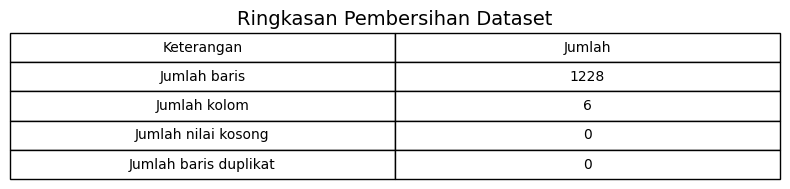

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("data_final.csv")  # Ganti nama file jika berbeda

# 2. Cek missing values dan duplikat
missing = df.isnull().sum()
duplikat = df.duplicated().sum()

# 3. Siapkan data untuk ditampilkan sebagai tabel
summary_data = [
    ["Jumlah baris", len(df)],
    ["Jumlah kolom", len(df.columns)],
    ["Jumlah nilai kosong", missing.sum()],
    ["Jumlah baris duplikat", duplikat]
]

# 4. Buat tabel menggunakan matplotlib
plt.figure(figsize=(8, 2))
plt.axis('off')
table = plt.table(
    cellText=summary_data,
    colLabels=["Keterangan", "Jumlah"],
    cellLoc='center',
    colLoc='center',
    loc='center'
)
table.scale(1, 2)
plt.title("Ringkasan Pembersihan Dataset", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


In [93]:
import pandas as pd

df = pd.read_csv("data_final.csv")
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])


Jumlah baris: 1228
Jumlah kolom: 6
